# Generalized Eigenvalues and Image Segmentation

In this exercise, we will implement an algorithm for image segmentation from a graph-theoretic approach. As a simplified problem, we will focus on separating the foreground of an image from its background. An image is described as a matrix $M$ of shape (N, M) whose values represent the gray scale color normalized between zero and one. Even though we restrict now to gray images, please note that the same algorithm could be easily extended to colored images.

In [ ]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

In [ ]:
# Question 2.1

M = misc.imread("img_cup_small.png", mode="L") 
M = M / 255

# Compute affinity matrix W and D for matrix M where 
# W[i,j] = np.exp(-abs(M[i][j] - M[n_i][n_j]) / sigma_i) * np.exp(-sqrt((i - n_i)**2 + (j - n_j)**2) / sigma_x)
# if pixel j is a neighbor of i within radius r (where sqrt((i - n_i)**2 + (j - n_j)**2) <= r) and zero otherwise. 
r = 5
sigma_i = 0.1
sigma_x = 4
W = np.zeros((M.shape[0] * M.shape[1], M.shape[0] * M.shape[1]))
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        for n_i in range(M.shape[0]):
            for n_j in range(M.shape[1]):
                if (((i - n_i)**2 + (j - n_j)**2)**(0.5) <= r):
                    W[M.shape[1] * i + j][M.shape[1] * n_i + n_j] = np.exp(-abs(M[i][j] - M[n_i][n_j]) / sigma_i) * np.exp(((i - n_i)**2 + (j - n_j)**2)**(0.5) / sigma_x)
                    
D = np.diag(W.sum(axis = 0))

Find the generalized eigenvector y for the eigenvector with the second smallest eigenvalue.

In [ ]:
# Question 2.3
U, sigma, Vh = np.linalg.svd(np.matmul(np.linalg.inv(D), D - W))
eigv_2 = U[:,-2]

In [ ]:
# Question 2.4

# TODO: Recover 3rd and 4th eigenvectors to compare segmentations. 
eigv_3 = U[:,-3]
eigv_4 = U[:,-4]

# TODO: compute median of second eigenvector
median = np.median(eigv_2)

# TODO: set values greater than median to 1, less than median to zero
segmentation_labels = np.asarray([1 if i > median else 0 for i in eigv_2])

# TODO: set values greater than 0 to 1, less than 0 to zero
segmentation_labels_2 = np.asarray([1 if i > 0 else 0 for i in eigv_2])

# Binary Image Visualization

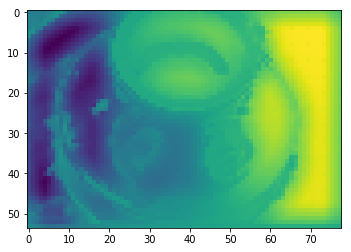

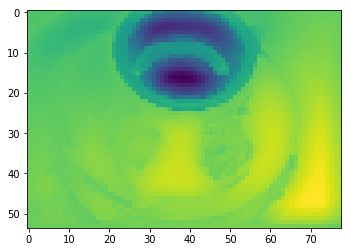

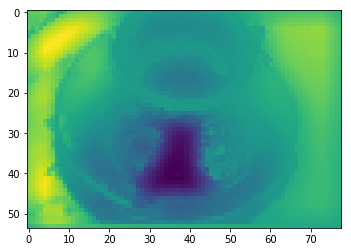

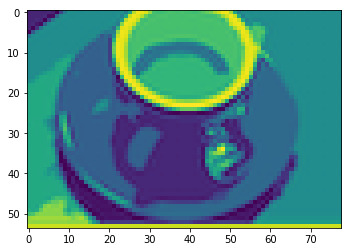

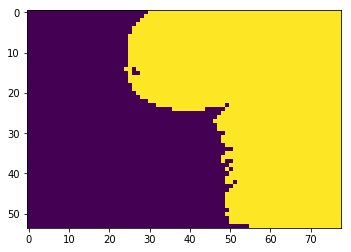

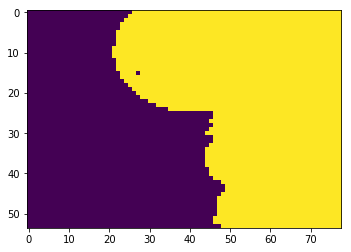

In [5]:
# Show heatmaps for 2nd, 3rd and 4th smallest eigenvectors.
plt.imshow(eigv_2.reshape((M.shape[0], M.shape[1])))
plt.show()

plt.imshow(eigv_3.reshape((M.shape[0], M.shape[1])))
plt.show()

plt.imshow(eigv_4.reshape((M.shape[0], M.shape[1])))
plt.show()

# Show original image. 
plt.imshow(M)
plt.show()

# Show segmentation labels.
segmented_labels = segmentation_labels.reshape((M.shape[0], M.shape[1]))
plt.imshow(segmented_labels)
plt.show()

# Show segmentation labels, thresholded at 0.
segmented_labels_2 = segmentation_labels_2.reshape((M.shape[0], M.shape[1]))
plt.imshow(segmented_labels_2)
plt.show()